In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_pickle('summary_df.pkl')
df2 = pd.read_pickle('summary_df_test.pkl')
df3 = pd.read_pickle('summary_df_test_2.pkl')

In [3]:
df = pd.concat([df1, df2, df3])

In [4]:
df.head()

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle,cell,cycle_life,C1,C2,Q1
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,b1c0,1190,3.6,3.6,80
1,0.016739,1.071289,1.070312,31.875000,29.562500,35.65625,13.343750,2.0,b1c0,1190,3.6,3.6,80
2,0.016724,1.071289,1.072266,31.937500,29.609375,35.68750,13.421875,3.0,b1c0,1190,3.6,3.6,80
3,0.016678,1.072266,1.072266,31.937500,29.750000,35.68750,13.421875,4.0,b1c0,1190,3.6,3.6,80
4,0.016663,1.073242,1.073242,31.953125,29.640625,35.71875,13.343750,5.0,b1c0,1190,3.6,3.6,80


In [5]:
df['cycle_life'].value_counts()

1935    1934
1836    1835
1801    1800
876     1750
870     1738
        ... 
438      464
335      361
300      326
209      208
148      170
Name: cycle_life, Length: 127, dtype: int64

In [6]:
df['cycle'] = df['cycle'].astype('int16')

In [7]:
df.shape

(110312, 13)

In [8]:
df = df[df['IR'] != 0]

In [9]:
df.shape

(110244, 13)

In [10]:
df = df[df['cycle'] <= 100]

In [11]:
df['cycle_life'].nunique()

127

In [12]:
df.head()

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle,cell,cycle_life,C1,C2,Q1
1,0.016739,1.071289,1.070312,31.875000,29.562500,35.65625,13.343750,2,b1c0,1190,3.6,3.6,80
2,0.016724,1.071289,1.072266,31.937500,29.609375,35.68750,13.421875,3,b1c0,1190,3.6,3.6,80
3,0.016678,1.072266,1.072266,31.937500,29.750000,35.68750,13.421875,4,b1c0,1190,3.6,3.6,80
4,0.016663,1.073242,1.073242,31.953125,29.640625,35.71875,13.343750,5,b1c0,1190,3.6,3.6,80
5,0.016617,1.073242,1.073242,31.968750,29.750000,35.71875,13.343750,6,b1c0,1190,3.6,3.6,80


In [13]:
y = df['cycle_life']

In [14]:
X = df.drop(['cycle_life','cell','cycle'], axis = 1)

In [15]:
print('X_shape: ', X.shape)
print('y_shape: ', y.shape)

X_shape:  (13743, 10)
y_shape:  (13743,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [17]:
print('X_train_shape: ', X_train.shape)
print('y_train_shape: ', y_train.shape)

print('X_test_shape: ', X_test.shape)
print('y_test_shape: ', y_test.shape)

X_train_shape:  (9620, 10)
y_train_shape:  (9620,)
X_test_shape:  (4123, 10)
y_test_shape:  (4123,)


In [18]:
df_result = pd.DataFrame()
df_result['y_test'] = y_test

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression(normalize=True)
reg_lin.fit(X_train, y_train)
df_result['y_pred'] = reg_lin.predict(X_test)

In [21]:
print('R2 error: ',r2_score(df_result['y_test'], df_result['y_pred']))
print('RMSE',np.sqrt(mean_squared_error(df_result['y_test'], df_result['y_pred'])))
print('MAE', mean_absolute_error(df_result['y_test'], df_result['y_pred']))

R2 error:  0.5414781561577601
RMSE 218.7409847435599
MAE 159.22206093787025


In [22]:
sum((abs(df_result['y_test'] - df_result['y_pred']))/df_result['y_test'])/len(df_result['y_pred'])*100

22.737551534156676

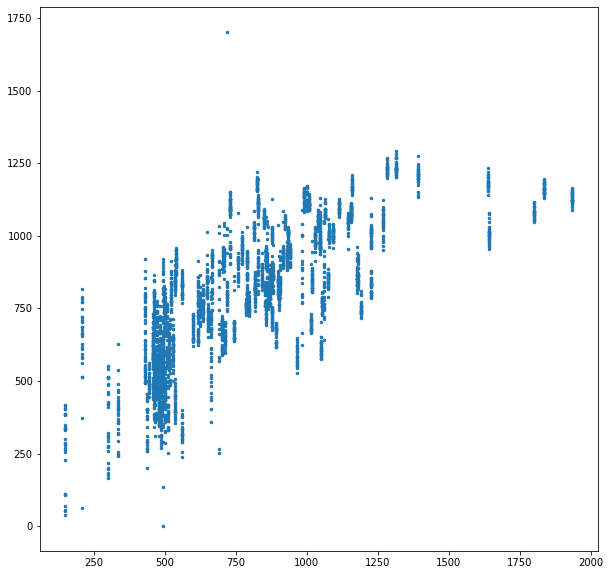

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(df_result['y_test'], df_result['y_pred'], s=6)


# Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor(n_estimators=500, random_state=0)
Forest.fit(X_train, y_train)
df_result['y_pred'] = Forest.predict(X_test)

In [25]:
print('R2 error: ',r2_score(df_result['y_test'], df_result['y_pred']))
print('RMSE',np.sqrt(mean_squared_error(df_result['y_test'], df_result['y_pred'])))
print('MAE', mean_absolute_error(df_result['y_test'], df_result['y_pred']))

R2 error:  0.9968522109824104
RMSE 18.123954188467287
MAE 2.2454557361144794


In [26]:
sum((abs(df_result['y_test'] - df_result['y_pred']))/df_result['y_test'])/len(df_result['y_pred'])*100

0.2663271875266925

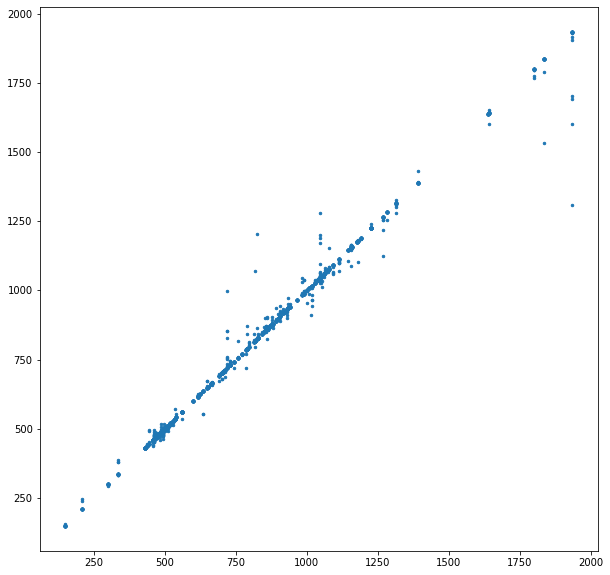

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(df_result['y_test'], df_result['y_pred'], s=6)

# XGBoosting

In [28]:
import xgboost as xgb

regr = xgb.XGBRegressor(
                 
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 random_state=0
                 )

regr.fit(X_train, y_train)

df_result['y_pred'] = regr.predict(X_test)

/home/tam/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
print('R2 error: ',r2_score(df_result['y_test'], df_result['y_pred']))
print('RMSE',np.sqrt(mean_squared_error(df_result['y_test'], df_result['y_pred'])))
print('MAE', mean_absolute_error(df_result['y_test'], df_result['y_pred']))

R2 error:  0.9961312977875129
RMSE 20.092445
MAE 7.952905


In [30]:
sum((abs(df_result['y_test'] - df_result['y_pred']))/df_result['y_test'])/len(df_result['y_pred'])*100

1.1547629255184502

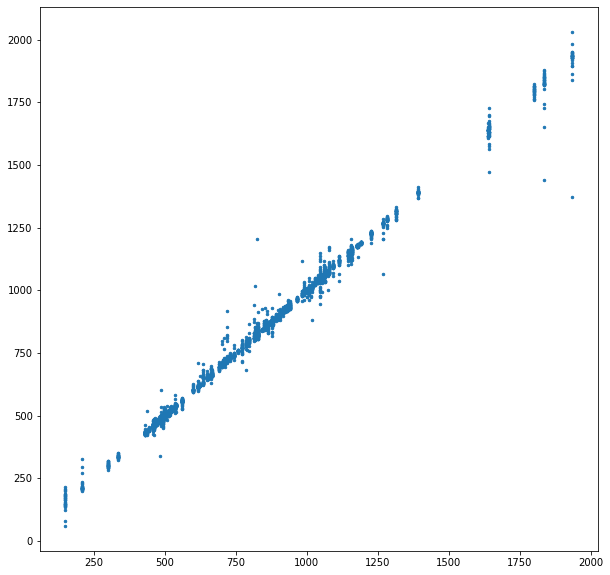

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(df_result['y_test'], df_result['y_pred'], s=6)

# Lasso Regression

In [32]:
from sklearn.linear_model import Lasso

# I found this best alpha through cross-validation.
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(X_train, y_train)
df_result['y_pred'] = regr.predict(X_test)


In [33]:
print('R2 error: ',r2_score(df_result['y_test'], df_result['y_pred']))
print('RMSE',np.sqrt(mean_squared_error(df_result['y_test'], df_result['y_pred'])))
print('MAE', mean_absolute_error(df_result['y_test'], df_result['y_pred']))

R2 error:  0.5414057508760319
RMSE 218.75825477948328
MAE 159.21288069912222


In [34]:
sum((abs(df_result['y_test'] - df_result['y_pred']))/df_result['y_test'])/len(df_result['y_pred'])*100

22.75118406944925

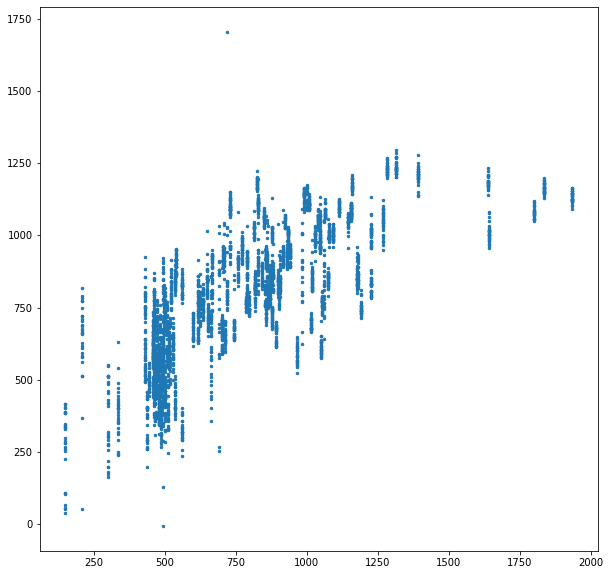

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(df_result['y_test'], df_result['y_pred'], s=6)

# Ridge regression

In [36]:
from sklearn.linear_model import Ridge

alpha=[0.01]#, 0.03, 0.1, 0.3, 1, 3, 10, 30]

ridge=Ridge(alpha=alpha, copy_X=True, fit_intercept=True)
ridge.fit(X_train, y_train)
df_result['y_pred']=ridge.predict(X_test)


In [37]:
print('R2 error: ',r2_score(df_result['y_test'], df_result['y_pred']))
print('RMSE',np.sqrt(mean_squared_error(df_result['y_test'], df_result['y_pred'])))
print('MAE', mean_absolute_error(df_result['y_test'], df_result['y_pred']))

R2 error:  0.5393155301375514
RMSE 219.25622569694443
MAE 159.66401232234384


In [38]:
sum((abs(df_result['y_test'] - df_result['y_pred']))/df_result['y_test'])/len(df_result['y_pred'])*100

22.931224268572905

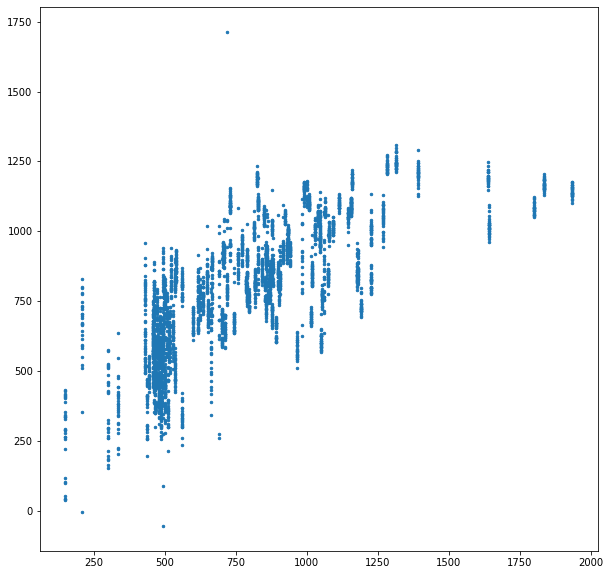

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(df_result['y_test'], df_result['y_pred'], s=6)